<a href="https://colab.research.google.com/github/RA2112704010029/Forest-Fire-predictions/blob/main/LAB_2_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET CHOOSEN:  https://raw.githubusercontent.com/rochitasundar/Stock-clustering-using-ML/master/stock_data.csv

In [ ]:
# Importing the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the file
df = pd.read_csv("https://raw.githubusercontent.com/rochitasundar/Stock-clustering-using-ML/master/stock_data.csv")
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# Finding out the shape
df.shape

(340, 15)

In [ ]:
# Finding out the information or the attributes in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [ ]:
# Finding the mean, median, mode
df['Net Income'].mean(), df['Net Income'].median(), df['Net Income'].mode()

(1494384602.9411764,
 707336000.0,
 0     355000000
 1     636056000
 2     848000000
 3    1034000000
 4    1899000000
 Name: Net Income, dtype: int64)

In [ ]:
# Finding the average Net Income
df['Net Income'].max()-df['Net Income'].min()

47970000000

In [ ]:
# Finding the IQR (Interquartile Range)
df['Net Income'].quantile(0.75)-df['Net Income'].quantile(0.25)

1546698750.0

In [ ]:
# Finding the variance
df['Net Income'].var()

1.5524784223688014e+19

In [ ]:
# Finding the standard deviation
df['Net Income'].std()

3940150279.327936

In [ ]:
# Finding the Coefficient of Variation
print('coefficient of variation:',df['Net Income'].std()/df['Net Income'].mean())
print('% of variation:',df['Net Income'].std()/df['Net Income'].mean() * 100)

coefficient of variation: 2.6366373633488465
% of variation: 263.6637363348847


In [ ]:
# Describing the numerical data of a dataset
df.describe()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
mean,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066
max,1274.949951,55.051683,4.580042,917.000000,958.000000,2.076400e+10,2.444200e+10,50.090000,6.159292e+09,528.039074,129.064585


In [ ]:
# Describing the numerical and categorical data of the dataset
df.describe(include="all")

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
count,340,340,340,340,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000
unique,340,340,11,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,AAL,American Airlines Group,Industrials,Oil & Gas Exploration & Production,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,53,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,80.862345,4.078194,1.525976,39.597059,70.023529,5.553762e+07,1.494385e+09,2.776662,5.770283e+08,32.612563,-1.718249
std,NaN,NaN,NaN,NaN,98.055086,12.006338,0.591798,96.547538,90.421331,1.946365e+09,3.940150e+09,6.587779,8.458496e+08,44.348731,13.966912
min,NaN,NaN,NaN,NaN,4.500000,-47.129693,0.733163,1.000000,0.000000,-1.120800e+10,-2.352800e+10,-61.200000,2.767216e+07,2.935451,-76.119077
25%,NaN,NaN,NaN,NaN,38.555000,-0.939484,1.134878,9.750000,18.000000,-1.939065e+08,3.523012e+08,1.557500,1.588482e+08,15.044653,-4.352056
50%,NaN,NaN,NaN,NaN,59.705000,4.819505,1.385593,15.000000,47.000000,2.098000e+06,7.073360e+08,2.895000,3.096751e+08,20.819876,-1.067170
75%,NaN,NaN,NaN,NaN,92.880001,10.695493,1.695549,27.000000,99.000000,1.698108e+08,1.899000e+09,4.620000,5.731175e+08,31.764755,3.917066


In [ ]:
# Finding the describe the numerical and categorical data about a column
df['Net Cash Flow'].describe(), df['Net Income'].describe()

(count    3.400000e+02
 mean     5.553762e+07
 std      1.946365e+09
 min     -1.120800e+10
 25%     -1.939065e+08
 50%      2.098000e+06
 75%      1.698108e+08
 max      2.076400e+10
 Name: Net Cash Flow, dtype: float64,
 count    3.400000e+02
 mean     1.494385e+09
 std      3.940150e+09
 min     -2.352800e+10
 25%      3.523012e+08
 50%      7.073360e+08
 75%      1.899000e+09
 max      2.444200e+10
 Name: Net Income, dtype: float64)

In [ ]:
# Finding the shape of the data using skew
df['Net Income'].skew()

0.9454167510148961

In [ ]:
# Finding the peakedness of distribution using Kurtosis
df.kurt(), df['Net Cash Flow'].kurt()

<ipython-input-17-68419c1ec4a9>:2: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.kurt(), df['Net Cash Flow'].kurt()


(Current Price                   71.436042
 Price Change                     3.010463
 Volatility                       5.887274
 ROE                             37.881425
 Cash Ratio                      32.185490
 Net Cash Flow                   47.666071
 Net Income                      14.818650
 Earnings Per Share              38.217378
 Estimated Shares Outstanding    17.261887
 P/E Ratio                       61.114612
 P/B Ratio                       29.646804
 dtype: float64,
 47.66607056228846)

In [ ]:
# Finding the correlation of the variables
df.corr()

<ipython-input-18-ac1f1390a8b0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
Current Price,1.000000,0.134982,-0.124257,-0.000549,0.127816,-0.021961,0.036625,0.479604,-0.145306,0.260273,0.124634
Price Change,0.134982,1.000000,-0.408281,-0.043310,0.168586,0.026746,0.179298,0.175401,0.033656,-0.002491,0.034329
Volatility,-0.124257,-0.408281,1.000000,0.162532,0.020605,-0.014172,-0.383433,-0.379309,-0.095704,0.263600,0.046528
ROE,-0.000549,-0.043310,0.162532,1.000000,-0.069122,-0.052205,-0.288524,-0.405291,-0.030288,0.023341,-0.063218
Cash Ratio,0.127816,0.168586,0.020605,-0.069122,1.000000,0.113819,0.028589,0.024759,0.135869,0.089483,0.229672
Net Cash Flow,-0.021961,0.026746,-0.014172,-0.052205,0.113819,1.000000,0.044229,0.019348,-0.051392,0.026876,0.057039
Net Income,0.036625,0.179298,-0.383433,-0.288524,0.028589,0.044229,1.000000,0.557752,0.589310,-0.224022,-0.061544
Earnings Per Share,0.479604,0.175401,-0.379309,-0.405291,0.024759,0.019348,0.557752,1.000000,-0.026906,-0.260660,0.014915
Estimated Shares Outstanding,-0.145306,0.033656,-0.095704,-0.030288,0.135869,-0.051392,0.589310,-0.026906,1.000000,-0.014551,-0.028155
P/E Ratio,0.260273,-0.002491,0.263600,0.023341,0.089483,0.026876,-0.224022,-0.260660,-0.014551,1.000000,0.036422


In [ ]:
df_Net_Income= sns.load_dataset('Net Income')
df_Net_Income.head()

<ipython-input-19-38b6d31cccd0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


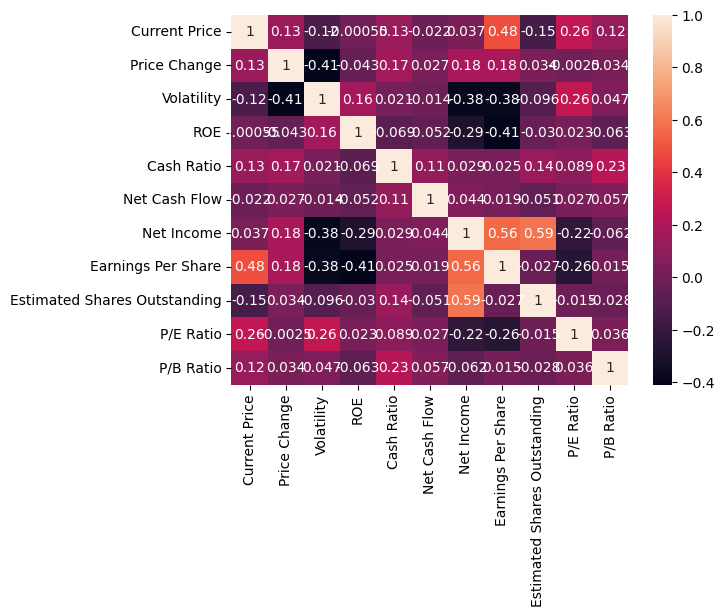

In [ ]:
# Showing the heatmap of the dataset
sns.heatmap(df.corr(),annot=True)
plt.show()